In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype 

dtype('uint8')

In [5]:
validation_images = train_images[50000:60000] / 255.0
validation_labels = train_labels[50000:60000]
train_images = train_images[0:50000] / 255.0
train_labels = train_labels[0:50000]
test_images = test_images / 255.0
test_labels = test_labels

In [6]:
print("Traning set:   {} samples".format(train_images.shape[0]))
print("Validation set: {} samples".format(validation_images.shape[0]))
print("Test set:      {} samples".format(test_images.shape[0]))

Traning set:   50000 samples
Validation set: 10000 samples
Test set:      10000 samples


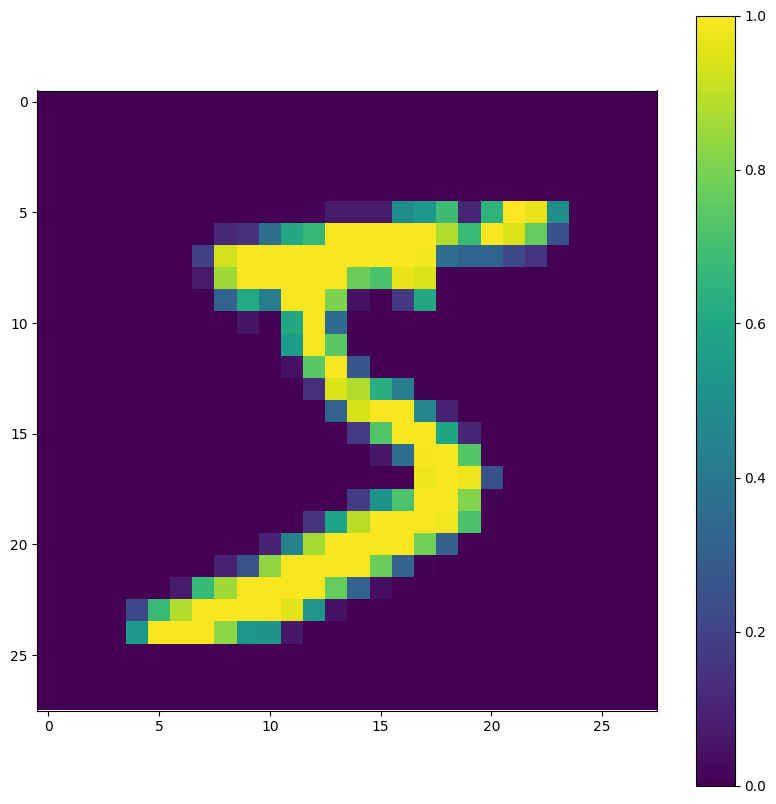

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

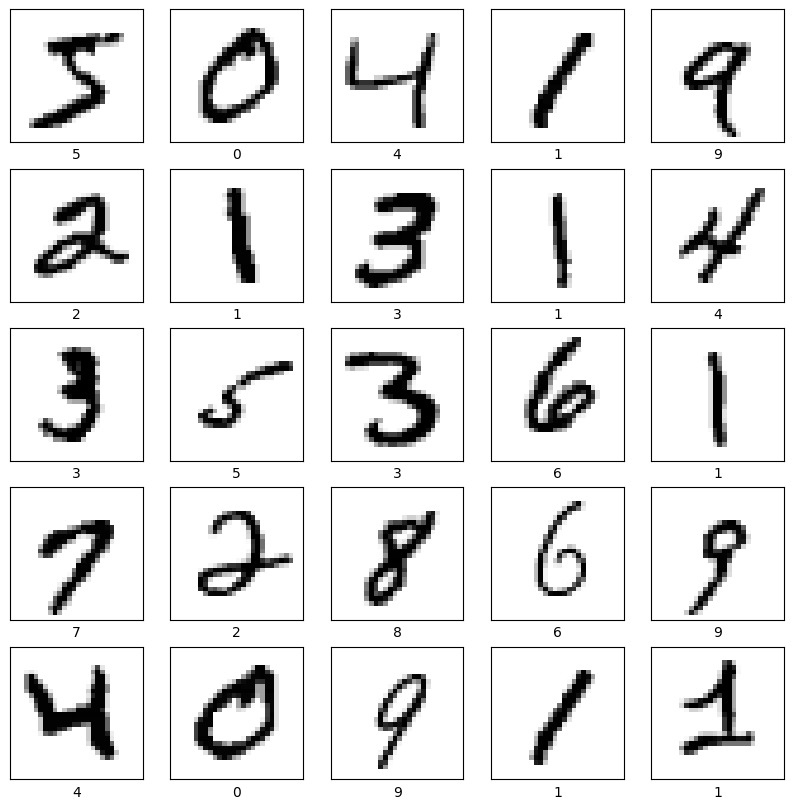

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(200, activation='relu' , kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(80, activation='relu' , kernel_initializer='he_normal' , kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))

d:\programs\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,146 (695.88 KB)

 Trainable params: 176,018 (687.57 KB)

 Non-trainable params: 2,128 (8.31 KB)

In [12]:
history = model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(validation_images, validation_labels))

test_loss, test_acc = model.evaluate(validation_images , validation_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8684 - loss: 0.4400 - val_accuracy: 0.9437 - val_loss: 0.2038
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9346 - loss: 0.2236 - val_accuracy: 0.9556 - val_loss: 0.1565
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9482 - loss: 0.1768 - val_accuracy: 0.9622 - val_loss: 0.1382
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9568 - loss: 0.1459 - val_accuracy: 0.9646 - val_loss: 0.1244
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9625 - loss: 0.1257 - val_accuracy: 0.9674 - val_loss: 0.1154
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1108 - val_accuracy: 0.9695 - val_loss: 0.1090
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9704 - loss: 0.0987 - val_accuracy: 0.9696 - val_loss: 0.1077
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9730 - loss: 0.0898 - 

In [14]:
print(history.params.keys())
print(history.epoch)
print(history.history.keys())

dict_keys(['verbose', 'epochs', 'steps'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [15]:
model.save('mnist_hand_written_model.h5')

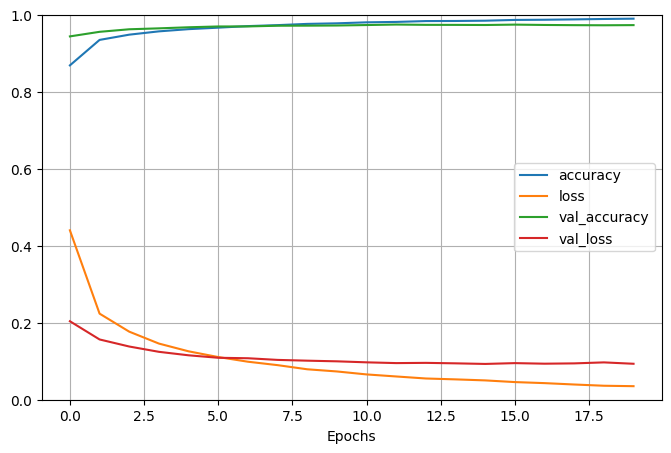

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.show()

In [17]:
#load model
model = keras.models.load_model('mnist_hand_written_model.h5')


In [18]:
X_pred = model.predict(validation_images)
y_pred = np.argmax(X_pred, axis=1)

print('predictions: ', y_pred[:10])
print('labels:      ', validation_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predictions:  [3 8 6 9 6 9 5 3 8 4]
labels:       [3 8 6 9 6 4 5 3 8 4]
